#### Objective
- Load inbuilt text data from the nltk library
- Count the number of words in the text
- Perform exploratory data analysis (data preprocessing, initial plots)


In [4]:
# Import the e-books available in the nltk corpus. As you can see I'm importing gutenberg. Now typing `gutenberg` can be cumbersome
# So I will use the `as` keyword for a simpler identifier.

import nltk
from nltk.corpus import gutenberg
print(gutenberg)
# Each e-book is identified by a fileid as shown next.
gutenberg.fileids()

<PlaintextCorpusReader in 'C:\\Users\\Dell-pc\\AppData\\Roaming\\nltk_data\\corpora\\gutenberg'>


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Now, lets pick up any text novel and continue with our experiments. My personal favorite is Macbeth by William Shakespeare.
Here, the raw() function will print the full text. 
Later, we will wrap the result of raw() to find total characters, words and sentences in the text.

In [5]:
# Show the text
gutenberg.raw('shakespeare-macbeth.txt')

"[The Tragedie of Macbeth by William Shakespeare 1603]\n\n\nActus Primus. Scoena Prima.\n\nThunder and Lightning. Enter three Witches.\n\n  1. When shall we three meet againe?\nIn Thunder, Lightning, or in Raine?\n  2. When the Hurley-burley's done,\nWhen the Battaile's lost, and wonne\n\n   3. That will be ere the set of Sunne\n\n   1. Where the place?\n  2. Vpon the Heath\n\n   3. There to meet with Macbeth\n\n   1. I come, Gray-Malkin\n\n   All. Padock calls anon: faire is foule, and foule is faire,\nHouer through the fogge and filthie ayre.\n\nExeunt.\n\n\nScena Secunda.\n\nAlarum within. Enter King Malcome, Donalbaine, Lenox, with\nattendants,\nmeeting a bleeding Captaine.\n\n  King. What bloody man is that? he can report,\nAs seemeth by his plight, of the Reuolt\nThe newest state\n\n   Mal. This is the Serieant,\nWho like a good and hardie Souldier fought\n'Gainst my Captiuitie: Haile braue friend;\nSay to the King, the knowledge of the Broyle,\nAs thou didst leaue it\n\n   Cap. 

# Get all text from txt book

In [6]:
# Save the text in an object
macbeth = gutenberg.raw('shakespeare-macbeth.txt')
# Check the object data type
type(macbeth)
# Standardise the text data 
#macbeth_lower = set(w.lower() for w in macbeth)

str

# How many characters, words and sentences in the text?

In [7]:
macbeth_chars = len ( gutenberg.raw('shakespeare-macbeth.txt') )
macbeth_words = len ( gutenberg.words('shakespeare-macbeth.txt') )
macbeth_sents = len ( gutenberg.sents('shakespeare-macbeth.txt') )

In [8]:
print ("\n Total characters are: ", macbeth_chars)
print ("\n Total words are: ", macbeth_words)
print ("\n Total sentences are: ", macbeth_sents)


 Total characters are:  100351

 Total words are:  23140

 Total sentences are:  1907


Let us explore now some basic statistics with textual data. We will discuss the question of what makes a text distinct, and use automatic
methods to find characteristic words and expressions of a text. 

We will first begin with `Frequency Distributions`. Here the research question is, "How can we automatically identify the words of a text that are most informative about the topic and genre of the text?"
One method would be to keep a tally for each vocabulary item, but, then it can be tiring process if the text data size is huge. So let us ask the machine to do the hard work :-)


# freqdist

In [9]:
from nltk import FreqDist
fd1 = FreqDist(macbeth)
print (fd1)


<FreqDist with 67 samples and 100351 outcomes>


Now let us find out the unique words. We can do this using the `keys()` function

In [8]:
vocab = fd1.keys()
vocab

dict_keys(['[', 'T', 'h', 'e', ' ', 'r', 'a', 'g', 'd', 'i', 'o', 'f', 'M', 'c', 'b', 't', 'y', 'W', 'l', 'm', 'S', 'k', 's', 'p', '1', '6', '0', '3', ']', '\n', 'A', 'u', 'P', '.', 'n', 'L', 'E', 'w', '?', 'I', ',', 'R', '2', 'H', '-', "'", 'B', 'V', 'G', ':', 'x', 'K', 'D', 'C', ';', '(', 'N', 'v', ')', 'O', 'F', 'Q', 'q', 'Y', 'z', '&', '!'])

The expression keys() gives us a list of all the distinct types in the text. 

As we can see the above text still contains several useless words like `is`, `the`, `it` etc. These are known as `stopwords`. We will see next on how to remove them.

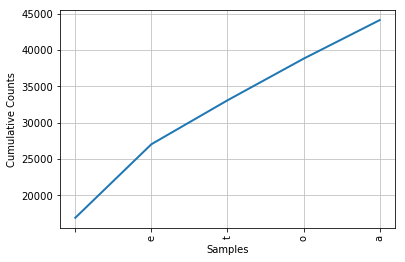

In [10]:
# plot a basic distribution
fd1.plot(5, cumulative=True)


Reference: See this SO thread (https://stackoverflow.com/questions/19130512/stopword-removal-with-nltk)

Stemming

In [2]:
# Remove stopwords

# import the stopwords library
from nltk.corpus import stopwords
# convert text data to lower

# save in a new object
filtered_words = [word for word in macbeth if word not in stopwords.words('english')]
# show the first 10 words 
filtered_words[:10]
print(stopwords.words('english'))

NameError: name 'macbeth' is not defined

Removing stop words with NLTK in Python
The process of converting data to something a computer can understand is referred to as pre-processing. One of the major forms of pre-processing is to filter out useless data. In natural language processing, useless words (data), are referred to as stop words.

What are Stop words?

Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

We would not want these words taking up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to be stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory. home/pratima/nltk_data/corpora/stopwords is the directory address.(Do not forget to change 

In [1]:
# import the Porter stemmer and save to an object
porter = nltk.PorterStemmer()
#text = IndexedText(porter, macbeth_lower)
#text
#text.concordance('missing')
macbeth_lower_stem=[porter.stem(t) for t in macbeth]
macbeth_lower_stem
porter.stem('analyze')

NameError: name 'nltk' is not defined

Lemmatization

The WordNet lemmatizer is a good choice if you want to compile the vocabulary of some texts and want a list of valid lemmas (or lexicon headwords).

In [44]:
wnl = nltk.WordNetLemmatizer()
macbeth_lower_lemma=[wnl.lemmatize(t) for t in macbeth]
macbeth_lower_lemma

['[',
 'T',
 'h',
 'e',
 ' ',
 'T',
 'r',
 'a',
 'g',
 'e',
 'd',
 'i',
 'e',
 ' ',
 'o',
 'f',
 ' ',
 'M',
 'a',
 'c',
 'b',
 'e',
 't',
 'h',
 ' ',
 'b',
 'y',
 ' ',
 'W',
 'i',
 'l',
 'l',
 'i',
 'a',
 'm',
 ' ',
 'S',
 'h',
 'a',
 'k',
 'e',
 's',
 'p',
 'e',
 'a',
 'r',
 'e',
 ' ',
 '1',
 '6',
 '0',
 '3',
 ']',
 '\n',
 '\n',
 '\n',
 'A',
 'c',
 't',
 'u',
 's',
 ' ',
 'P',
 'r',
 'i',
 'm',
 'u',
 's',
 '.',
 ' ',
 'S',
 'c',
 'o',
 'e',
 'n',
 'a',
 ' ',
 'P',
 'r',
 'i',
 'm',
 'a',
 '.',
 '\n',
 '\n',
 'T',
 'h',
 'u',
 'n',
 'd',
 'e',
 'r',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'L',
 'i',
 'g',
 'h',
 't',
 'n',
 'i',
 'n',
 'g',
 '.',
 ' ',
 'E',
 'n',
 't',
 'e',
 'r',
 ' ',
 't',
 'h',
 'r',
 'e',
 'e',
 ' ',
 'W',
 'i',
 't',
 'c',
 'h',
 'e',
 's',
 '.',
 '\n',
 '\n',
 ' ',
 ' ',
 '1',
 '.',
 ' ',
 'W',
 'h',
 'e',
 'n',
 ' ',
 's',
 'h',
 'a',
 'l',
 'l',
 ' ',
 'w',
 'e',
 ' ',
 't',
 'h',
 'r',
 'e',
 'e',
 ' ',
 'm',
 'e',
 'e',
 't',
 ' ',
 'a',
 'g',
 'a',
 'i',
 'n',
 'e

##### Sentence Segmentation
Before tokenizing the text into words, we need to segment it into sentences. NLTK facilitates this by including the Punkt sentence segmenter (Kiss & Strunk, 2006). Here is an example of its use in segmenting the text of a novel.

In [10]:
sent_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')

sents = sent_tokenizer.tokenize(macbeth)
sents[100:110]


['Banq.',
 "The Earth hath bubbles, as the Water ha's,\nAnd these are of them: whither are they vanish'd?",
 'Macb.',
 "Into the Ayre: and what seem'd corporall,\nMelted, as breath into the Winde.",
 "Would they had stay'd\n\n   Banq.",
 'Were such things here, as we doe speake about?',
 'Or haue we eaten on the insane Root,\nThat takes the Reason Prisoner?',
 'Macb.',
 'Your Children shall be Kings\n\n   Banq.',
 'You shall be King\n\n   Macb.']

In [3]:
##### Parts of Speech (POS) Tagging
text = nltk.word_tokenize(macbeth)
nltk.pos_tag(text)

NameError: name 'macbeth' is not defined

In [4]:
 >>> import nltk
>>> nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell-pc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# sentiment analysis

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
hotel_rev = ["Great place to be when you are in Bangalore.",
"The place was being renovated when I visited so the seating was limited.",
"Loved the ambience, loved the food",
"The food is delicious but not over the top.",
"Service - Little slow, probably because too many people",
"The place is not easy to locate",
"Mushroom fried rice was tasty"]
  
sid = SentimentIntensityAnalyzer()
for sentence in hotel_rev:
     print(sentence)
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print("{0}: {1}, ".format(k, ss[k]), end='\n')
     

[nltk_data] Downloading package vader_lexicon to C:\Users\Dell-
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Great place to be when you are in Bangalore.
neg: 0.0, 
neu: 0.661, 
pos: 0.339, 
compound: 0.6249, 
The place was being renovated when I visited so the seating was limited.
neg: 0.147, 
neu: 0.853, 
pos: 0.0, 
compound: -0.2263, 
Loved the ambience, loved the food
neg: 0.0, 
neu: 0.339, 
pos: 0.661, 
compound: 0.8316, 
The food is delicious but not over the top.
neg: 0.168, 
neu: 0.623, 
pos: 0.209, 
compound: 0.1184, 
Service - Little slow, probably because too many people
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
compound: 0.0, 
The place is not easy to locate
neg: 0.286, 
neu: 0.714, 
pos: 0.0, 
compound: -0.3412, 
Mushroom fried rice was tasty
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
compound: 0.0, 


# classification

In [12]:
import nltk
from nltk.tokenize import word_tokenize
  
# Step 1 – Training data
train = [("Great place to be when you are in Bangalore.", "pos"),
  ("The place was being renovated when I visited so the seating was limited.", "neg"),
  ("Loved the ambience, loved the food", "pos"),
  ("The food is delicious but not over the -+","neg"),
  ("Mushroom fried rice was spicy", "pos"),
]
for passage in train :
    for word in word_tokenize(passage[0]):
        pass
         #print(word.lower())
# Step 2
dictionary = set(word.lower() for passage in train for word in word_tokenize(passage[0]))
  
# Step 3
t = [({word: (word in word_tokenize(x[0])) for word in dictionary}, x[1]) for x in train]
  
# Step 4 – the classifier is trained with sample data
classifier = nltk.NaiveBayesClassifier.train(t)
  
test_data = "Manchurian was hot and spicy"
test_data_features = {word.lower(): (word in word_tokenize(test_data.lower())) for word in dictionary}
print (classifier.classify(test_data_features))

pos


In [15]:

from nltk.classify import SklearnClassifier

from sklearn.ensemble import GradientBoostingClassifier
classif = SklearnClassifier(GradientBoostingClassifier()).train(t)
print (classif.classify(test_data_features))

pos


In [7]:
#classification



pos
